## adapted from https://www.kaggle.com/ajay1735/my-credit-scoring-model/code

# Credit scoring model


#### Objective : Create a credit scoring algorithm that predicts the chance of a given loan applicant defaulting on loan repayment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

# importing necessary libraries

In [2]:
df = pd.read_csv("hmeq.csv")
#df_i = pd.read_csv("hmeq.csv")

# reading the input
# Storing it in 2 dataframes, We will carry out our operations on df.In case of need for initial table without any changes we can use df_i

In [3]:
df.head(3)

# glimpse of the dataset

,rec_ID,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,2,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,3,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN


## Section: Understanding the data

In [5]:
df.info()

# number of entries that are populated

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 14 columns):
rec_ID     5960 non-null int64
BAD        5960 non-null int64
LOAN       5960 non-null int64
MORTDUE    5442 non-null float64
VALUE      5848 non-null float64
REASON     5708 non-null object
JOB        5681 non-null object
YOJ        5445 non-null float64
DEROG      5252 non-null float64
DELINQ     5380 non-null float64
CLAGE      5652 non-null float64
NINQ       5450 non-null float64
CLNO       5738 non-null float64
DEBTINC    4693 non-null float64
dtypes: float64(9), int64(3), object(2)
memory usage: 652.0+ KB


In [6]:
df.describe()

# Descriptive stats
# Distribution of the data
# There are no anomalies in the data(observe the maximums and means in each case)

,rec_ID,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,2980.500000,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,1720.648134,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,1.000000,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,1490.750000,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,2980.500000,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,4470.250000,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,5960.000000,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


## Distributions of various variables

0    4771
1    1189
Name: BAD, dtype: int64


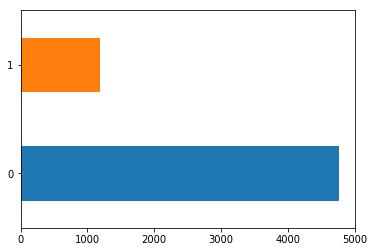

In [8]:
print(df["BAD"].value_counts())
df["BAD"].value_counts().plot("barh")

# distribution of target variable "BAD"
# The target class is a bit unbalanced - zeroes are about 80% and ones are about 20%

In [6]:
print("---Nominal Features:\n") 
print(df["REASON"].value_counts()) # This is a nominal feature, It must be modified in a way we can use it.
print(df["JOB"].value_counts()) # Same as the above case, we must find a way to use it.

Nominal Features:

DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64
Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64


## Section: Visualize and Understand Input Data

plot some histograms and print some value counts to understand the data

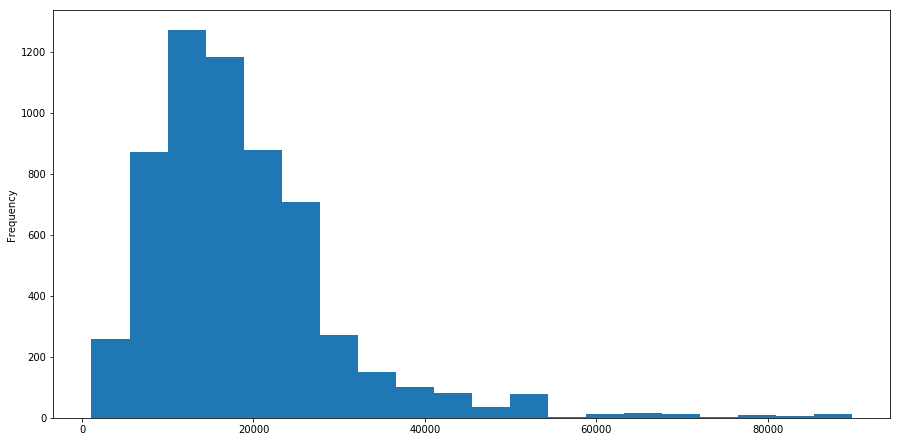

In [11]:
df["LOAN"].plot.hist(bins = 20,figsize=(15,7.5))
# density between 10000-30000 is high

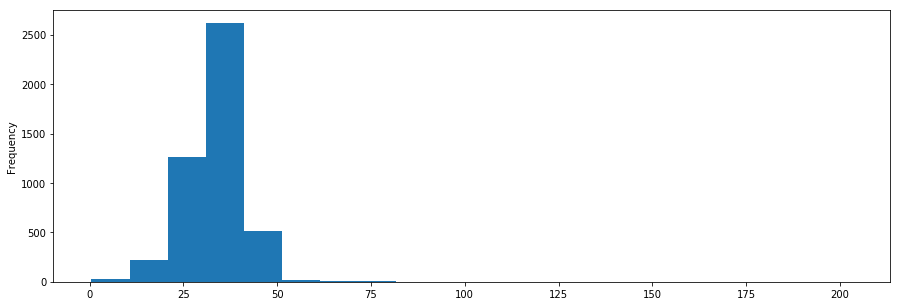

In [12]:
df["DEBTINC"].plot.hist(bins = 20,figsize=(15,5))
# Highly populated around 25-50
# We may cap off the end values if required.

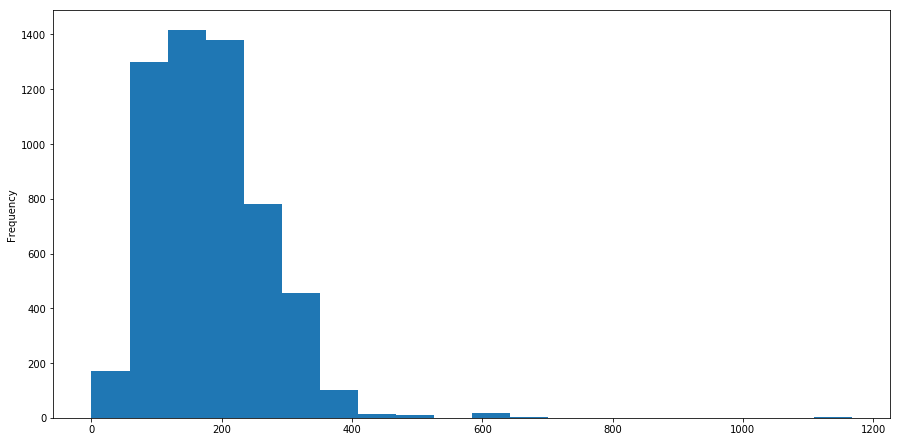

In [13]:
df["CLAGE"].plot.hist(bins = 20,figsize=(15,7.5))
# Density is high around 100-300
# We can cap off the values >= 600 to get better results

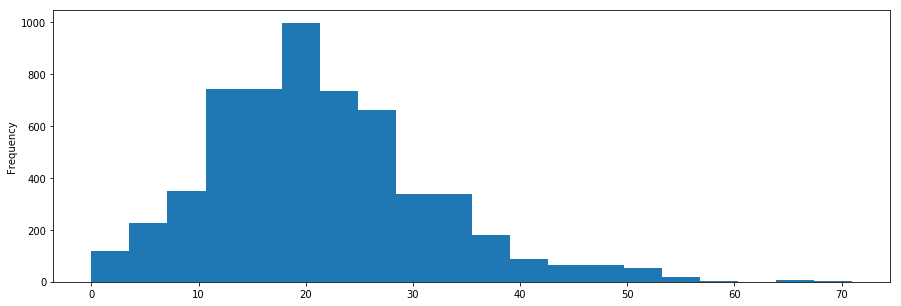

In [14]:
df["CLNO"].plot.hist(bins = 20,figsize=(15,5))
# This distribution looks good and we need not modify anything here.

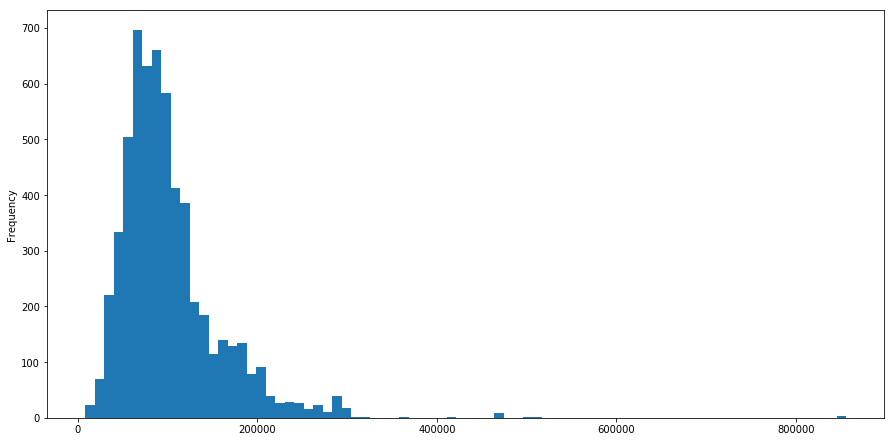

In [15]:
df["VALUE"].plot.hist(bins = 80,figsize=(15,7.5))
# Concentration is high around 80000-100000
# There are very less values at the end(>= 400000) that are a bit high compared to mean. We can cap these off.

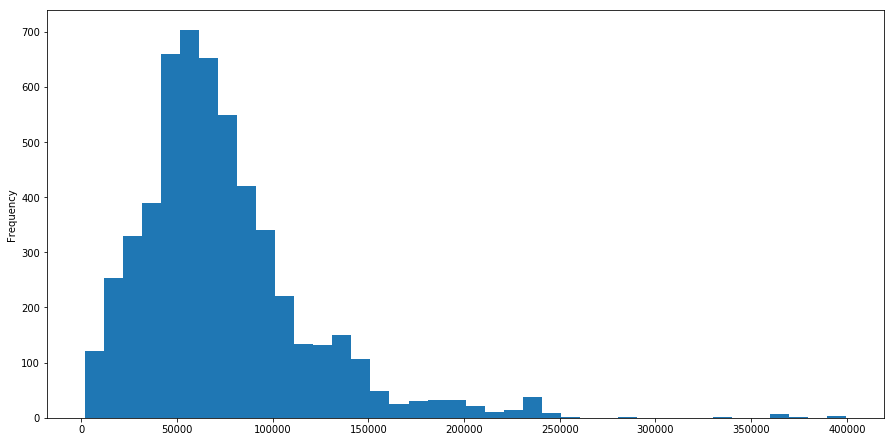

In [16]:
df["MORTDUE"].plot.hist(bins = 40,figsize=(15,7.5))
# Concentration is high around 40000-100000
# The values at the end(>= 300000) can be capped off.

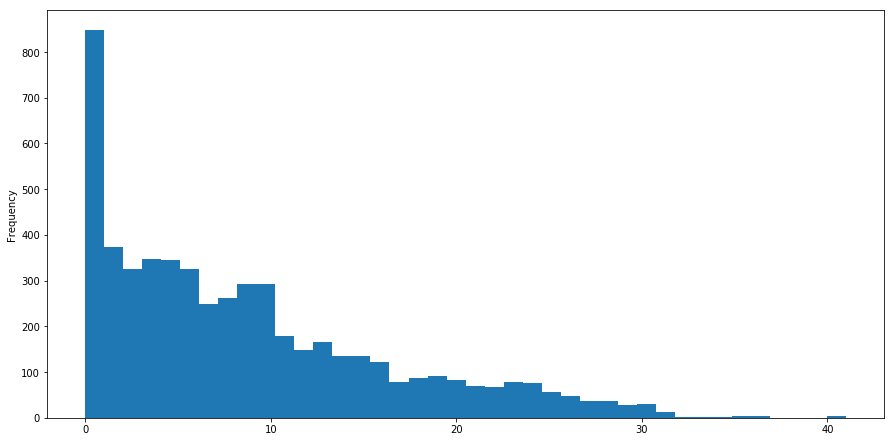

In [17]:
df["YOJ"].plot.hist(bins = 40,figsize=(15,7.5))
# This is very skewed. It would be better if we modify this variable to decrease the skewness.

In [11]:
df["DEROG"].value_counts()
# Derogatory incidents were reported only in few cases.
# So,creating a binary variable with values 1 for atleast one derogatory incident and 0 for no such report may be useful.

0.0     4527
1.0      435
2.0      160
3.0       58
4.0       23
6.0       15
5.0       15
7.0        8
8.0        6
9.0        3
10.0       2
Name: DEROG, dtype: int64

In [19]:
df["DELINQ"].value_counts()
# Most of them are zero.
# Same as in above case creating a binary variable would be useful.

0.0     4179
1.0      654
2.0      250
3.0      129
4.0       78
5.0       38
6.0       27
7.0       13
8.0        5
11.0       2
10.0       2
13.0       1
12.0       1
15.0       1
Name: DELINQ, dtype: int64

In [20]:
df["NINQ"].value_counts()
# Distributed mostly among first five values

0.0     2531
1.0     1339
2.0      780
3.0      392
4.0      156
5.0       75
6.0       56
7.0       44
10.0      28
8.0       22
9.0       11
11.0      10
13.0       2
12.0       2
17.0       1
14.0       1
Name: NINQ, dtype: int64

### Conclusions :

- The distributions are fine and there are no anomalies in the data.
<br>
- DEBTINC has very high number of missing data(will be taken care of in next section - Imputing the variables).
<br>
- The feature YOJ is highly skewed and may be modified to decrease skewness.
<br>
- Nominal features : JOB and REASON must be modified in a way that we can use them for logistic regression model.
<br>
- DELINQ,DEROG may be divided into 2 classes to create new binary variables.
<br>
- VALUE,MORTDUE,CLAGE,DEBTINC may be capped off at the end that is values that are very high will be set to a selected lower value.


## Section: Imputing the input variables

In [3]:
df.isnull().sum()

# Number of cases with Nan.

rec_ID        0
BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

#### Observations :
- Except in the case of DEBTINC, in all other cases only few values were not reported
- For imputing the missing values we can think of few ideas like :
    - In case of nominal features, replacing them with the majority class
    - In case of numeric variables like DEROG and DELINQ,most of the cases are 0.We can replace these with majority class.
    - In case of other numerical inputs , we can replace them by median or mean without modifying the much.In this   notebook I am going to replace them by mean of the respective column.

In [3]:
# Nominal features
# Replacement using majority class
# majority class in case of JOB variable is Other
# majority class in case of REASON variable is DebtCon

df["REASON"].fillna(value = "DebtCon",inplace = True)
df["JOB"].fillna(value = "Other",inplace = True)

In [4]:
# majority class for each below is "0"
df["DEROG"].fillna(value=0,inplace=True)
df["DELINQ"].fillna(value=0,inplace=True)

In [5]:
# Numeric features
# Replacement using mean of each class

df.fillna(value=df.mean(),inplace=True)

In [6]:
df.isnull().sum()

# Checking if there is anything left out
# As you can see, all missing values are filled

rec_ID     0
BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

##### Final look at the data after filling the missing values

In [7]:
df.head()

,rec_ID,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1,1100,25860.0000,39025.000000,HomeImp,Other,10.500000,0.0,0.0,94.366667,1.000000,9.000000,33.779915
1,2,1,1300,70053.0000,68400.000000,HomeImp,Other,7.000000,0.0,2.0,121.833333,0.000000,14.000000,33.779915
2,3,1,1500,13500.0000,16700.000000,HomeImp,Other,4.000000,0.0,0.0,149.466667,1.000000,10.000000,33.779915
3,4,1,1500,73760.8172,101776.048741,DebtCon,Other,8.922268,0.0,0.0,179.766275,1.186055,21.296096,33.779915
4,5,0,1700,97800.0000,112000.000000,HomeImp,Office,3.000000,0.0,0.0,93.333333,0.000000,14.000000,33.779915


In [8]:
df.REASON.unique()
df.JOB.unique()

array(['Other', 'Office', 'Sales', 'Mgr', 'ProfExe', 'Self'], dtype=object)

# Applying the models on the data after imputation
- Applying the basic Classification on the data after replacement/imputation.Lets check the performnace by applying both Random Forest and Decision tree algorithms.
- Before applying the algorithms, The data is split into training and testing sets in the ratio 2:1 that is test data 33% and train data 67%.
- And also taking all the columns except JOB,REASON as input features(as they are nominal features, they must be transformed to other variables to be usable which is taken care of in next section).

In [9]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Section: Train the decision tree classifier

accuracy score :  0.84799186578546
f1 score :  0.7071915514989846
precision score :  0.8140353896010784
recall score :  0.6727782809428086
Confusion matrix, without normalization
[[1516   45]
 [ 254  152]]


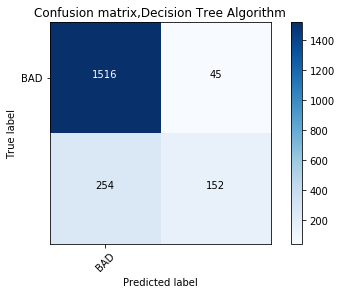

In [10]:
# importing the required modules
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score 

dectree_basic = DecisionTreeClassifier()
dectree_basic.max_depth = 4
dectree_basic.max_features = 4
dectree_basic.max_leaf_nodes = 8

x_basic = df.drop(columns=["BAD","JOB","REASON","rec_ID"])
y = df["BAD"]

# Spliting the data into test and train sets
x_basic_tr,x_basic_te,y_tr,y_te = train_test_split(x_basic,y,test_size =.33,random_state=1)

# Training the basic Decision Tree model with training set 
dectree_basic.fit(x_basic_tr,y_tr)

# Predicting the output of the test cases using the algorithm created above
y_pre = dectree_basic.predict(x_basic_te)

# Validating the algorithm using various Performance metrics

a2 = accuracy_score(y_te,y_pre)
f2 = f1_score(y_te, y_pre, average="macro")
p2 = precision_score(y_te, y_pre, average="macro")
r2 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a2)
print("f1 score : ",f2)
print("precision score : ",p2)
print("recall score : ",r2)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],
                      title='Confusion matrix,Decision Tree Algorithm')

plt.show()

In [11]:
# look at some info about the model
dectree_basic.get_params(deep=True)
# dectree_basic.tree_


{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 4,
 'max_leaf_nodes': 8,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

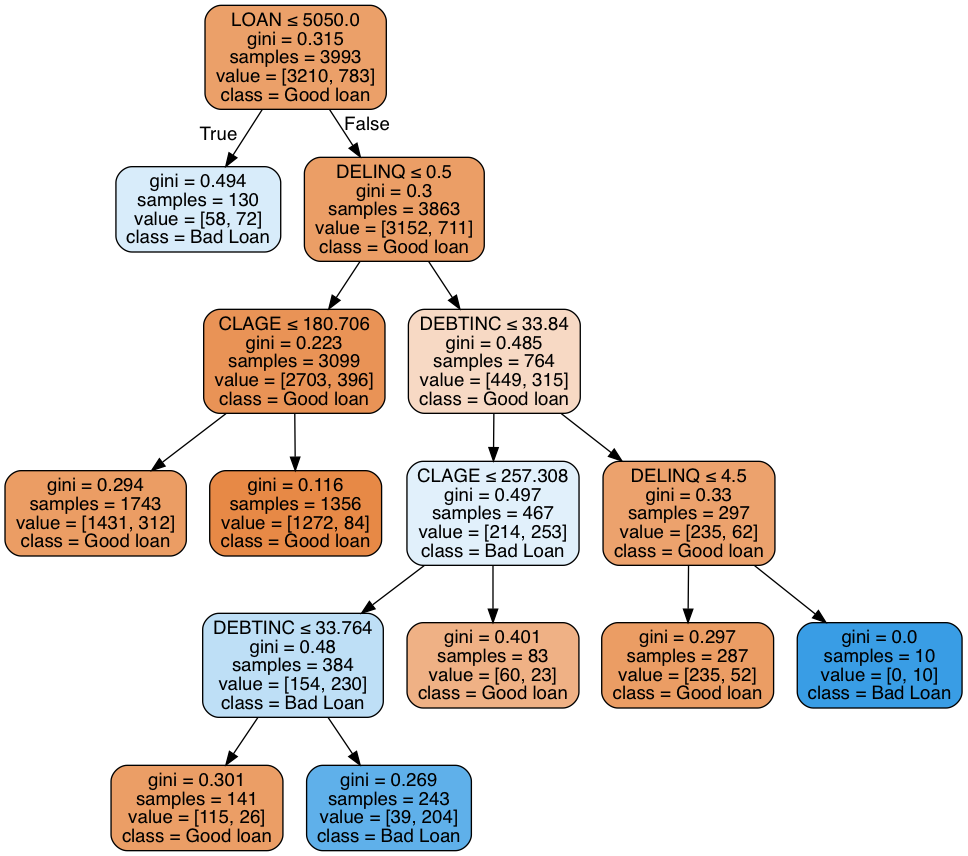

In [12]:
feature_names = x_basic.columns.values
# visualize the tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dectree_basic, out_file=dot_data,  
                filled=True, rounded=True,
                feature_names=x_basic.columns.values, class_names=["Good loan", "Bad Loan"], 
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [13]:
print(dectree_basic.tree_.feature)

[ 0 -2  5  6  9  6  5 -2 -2  9 -2 -2 -2 -2 -2]


In [18]:
# get the module from local since it's not already in the python path
import sys
sys.path.append("/Users/brad/Desktop/code/model_publish_redis")
import pyredismlconnector

In [52]:
from importlib import reload
reload(pyredismlconnector)

# example use of the above
redis_ml_string, redis_key_name = pyredismlconnector.redisml_tree_string(
    forest = dectree_basic, 
    feature_names = x_basic.columns.values,
    verbose = True)
print(redis_key_name)
print(redis_ml_string)

Creating Redis ML string for a forest with a single tree
------
Here are the input forest's parameters: 
{'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': 4, 'max_leaf_nodes': 8, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}
------
Here is the output string: 
ML.FOREST.ADD tree-7db9f948-8ef8-44a0-a2a7-89c194140cb8 0 . NUMERIC LOAN 5050.0 .l LEAF 1 .r NUMERIC DELINQ 0.5 .rl NUMERIC CLAGE 180.70565795898438 .rll LEAF 0 .rlr LEAF 0 .rr NUMERIC DEBTINC 33.83998489379883 .rrl NUMERIC CLAGE 257.3079833984375 .rrll NUMERIC DEBTINC 33.76351547241211 .rrlll LEAF 0 .rrllr LEAF 1 .rrlr LEAF 0 .rrr NUMERIC DELINQ 4.5 .rrrl LEAF 0 .rrrr LEAF 1 
------
Here are the used input vars: 
{'CLAGE', 'DEBTINC', 'LOAN', 'DELINQ'}
------
tree-7db9f948-8ef8-44a0-a2a7-89c194140cb8
ML.FOREST.ADD tree-7db9f948-8ef8-44a0-a2a7-89c194140cb8 

In [ ]:
# look at some info about the model
rf_basic.get_params(deep=True)

In [50]:
from importlib import reload
reload(pyredismlconnector)

# example use of the above
redis_ml_strings, redis_key_name = pyredismlconnector.redisml_forest_string(
    forest = rf_basic, 
    feature_names = x_basic.columns.values,
    verbose = True)
print(redis_key_name)
for cmd in redis_ml_strings:
    print(cmd)

Creating Redis ML string for a forest with [10] trees
------
Here are the input forest's parameters: 
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 8, 'max_leaf_nodes': 8, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': 1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
------
Here is the output string: 
ML.FOREST.ADD forest-b6319f34-2a74-4b0e-8884-e881f75a0169 0 . NUMERIC DELINQ 1.5 .l NUMERIC DEBTINC 44.56532669067383 .ll NUMERIC DEBTINC 33.56645584106445 .lll LEAF 0 .llr NUMERIC DEBTINC 33.784217834472656 .llrl NUMERIC CLAGE 180.58334350585938 .llrll LEAF 1 .llrlr LEAF 0 .llrr LEAF 0 .lr LEAF 1 .r NUMERIC DEBTINC 33.86167907714844 .rl NUMERIC DEBTINC 33.74707794189453 .rll LEAF 0 .rlr LEAF 1 .rr LEAF 0 
ML.FOREST.ADD forest-b6319f34-2a74-4b0e-8884-e881f75a0169 1 . NUMERIC DEROG 1.5 .l NU

In [51]:
pyredismlconnector.redisml_string_to_redis(True, redis_ml_strings)

True

<br><br><br><br><br><br><br>

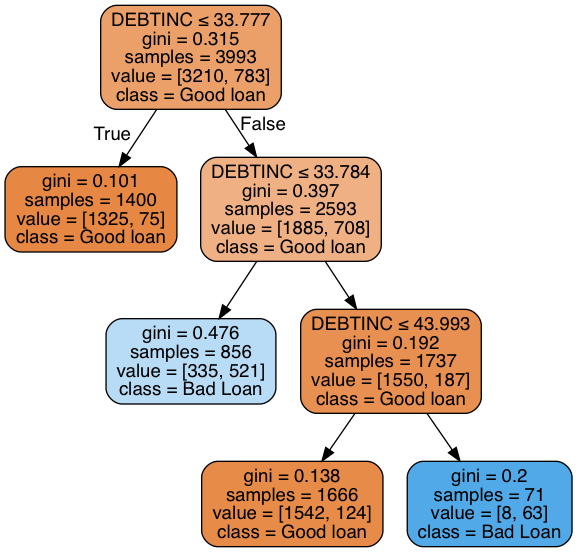

In [19]:
# visualize the tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dectree_basic, out_file=dot_data,  
                filled=True, rounded=True,
                feature_names=x_basic.columns.values, class_names=["Good loan", "Bad Loan"], 
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### Here is a description of the data: 
![HMEQ data description](hmeq_data_desc.png)

## Thesis To Do:
* Train RF model
* OHE the JOB and REASON columns

## Section: Train the Random forest classifier

accuracy score :  0.8693441789527199
f1 score :  0.7561988513081092
precision score :  0.8552645218806529
recall score :  0.716301442488237
Confusion matrix, without normalization
[[1525   36]
 [ 221  185]]


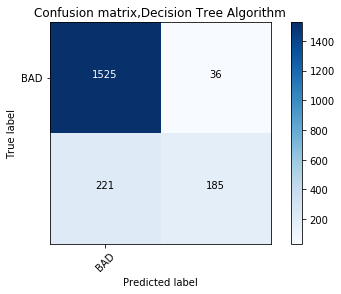

In [49]:
# importing the required modules
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score 

rf_basic = RandomForestClassifier()
rf_basic.n_estimators = 10  # number of trees
rf_basic.max_depth = 20
rf_basic.max_features = 8
rf_basic.max_leaf_nodes = 8

x_basic = df.drop(columns=["BAD","JOB","REASON","rec_ID"])
y = df["BAD"]

# Spliting the data into test and train sets
x_basic_tr,x_basic_te,y_tr,y_te = train_test_split(x_basic,y,test_size =.33,random_state=1)

# Training the basic Decision Tree model with training set 
rf_basic.fit(x_basic_tr,y_tr)

# Predicting the output of the test cases using the algorithm created above
y_pre = rf_basic.predict(x_basic_te)

# Validating the algorithm using various Performance metrics

a2 = accuracy_score(y_te,y_pre)
f2 = f1_score(y_te, y_pre, average="macro")
p2 = precision_score(y_te, y_pre, average="macro")
r2 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a2)
print("f1 score : ",f2)
print("precision score : ",p2)
print("recall score : ",r2)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],
                      title='Confusion matrix,Decision Tree Algorithm')

plt.show()

In [127]:
# extract details of the tree
the_tree = rf_basic
for tree_in_forest in the_tree.estimators_:
    print(tree_in_forest)
# the_tree.
# t_nodes = the_tree.tree_.node_count
# t_left = the_tree.tree_.children_left
# t_right = the_tree.tree_.children_right
# t_feature = the_tree.tree_.feature
# t_threshold = the_tree.tree_.threshold
# t_value = the_tree.tree_.value
# feature_names = x_basic.columns.values

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=2, max_leaf_nodes=4, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1279992063, splitter='best')


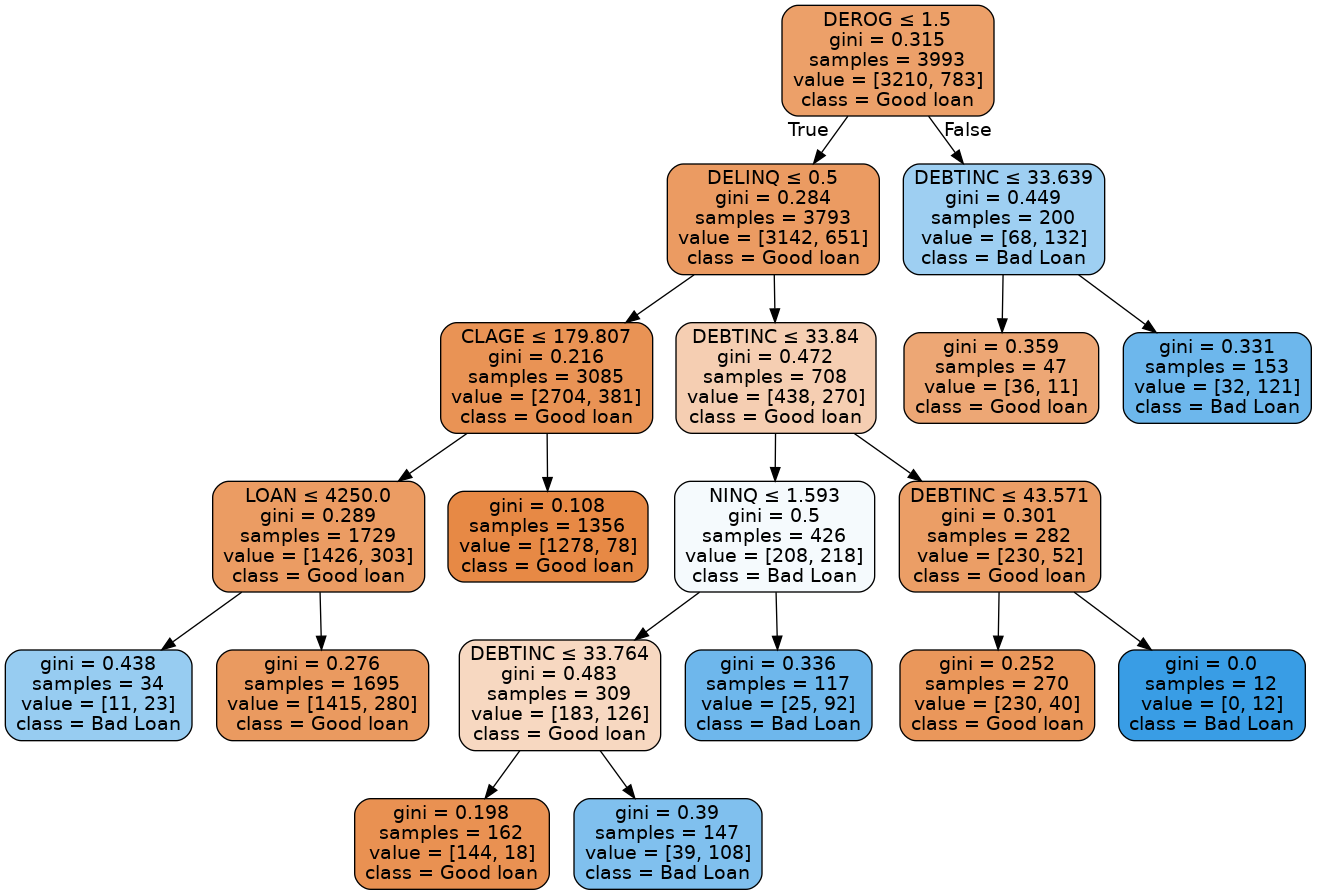

In [63]:
# visualize the tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(the_tree, out_file=dot_data,  
                filled=True, rounded=True,
                feature_names=feature_names, class_names=["Good loan", "Bad Loan"], 
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# ----- END here for the purpose of the Thesis
<br>
<br><br><br><br>




#### Some discussion on Performance metrics :
- Generally Accuracy test can be used to evaluate algorithms. But in this case,just using the MAJORITY CLASS(0) to predict the output will give high(79.2%) accuracy.BUT WE WOULD END UP PREDICTING ALL "1" AS O's INSTEAD.
<br>
- Hence other performance metrics must be used to evaluate the model.And those would be
    - F1 score : Weighted mean of Recall and Precision
    - Recall : (TP/TP+FN)
    - Precision : (TP/TP+FP)
      TP is true positive,FN is false negative,FP is false positive
<br>
- Here we want to decrease the number of False Negatives i.e, We predict that credit will be repaid but it actually being a fraudant one.To decrease FN implies to increase Recall.Therefore, RECALL will the perfect Performance metric to evaluate this model.
<br>
- Precsion may decrease in the process to increase recall but it is okay to predict some extra False Positives.
##### We can also RESAMPLE the data(We will get back to this at the end).

#### Conclusions :

- Using Logistic Regression though Accuracy is good(79%), the model did not perform well on other performance metrics.Recal is just above .5 and this is not good.This may be due to overfitting and we will try to remove this in the next section.
<br>
- Surprisingly,Decision Tree algorithm worked very well compared to Logistic Regression with a RECALL of about .78 and very good ACCURACY.This is beacause this model implicitly performs variable selection/feature selection by spliting the top nodes based on the most important features of the data and feature selection is done automatically.
<br>
- Finally what I want say that is :
    - There will be a good improvement in Logistic Regression model after Feature Selection.
    - The results will almost stay same in the case of Decision Tree model even after Feature Selection.
<br>
- We will prove the above hypothesis by creating models with selected features and compare them will the above models.

# Feature transformation

- Before Feature selection,As discussed in the section "Distribution of various Features" we need to transform some variables in order to improve predictability.
- We have transform the whole data set not just training set.

In [ ]:
# Capping off the features CLAGE(values >= 600 to 600) , VALUE(values>=400000 to 400000) , MORTDUE(values>=300000 to 300000) and DEBTINC(values >=100 to 100)

df.loc[df["CLAGE"]>=600,"CLAGE"] = 600
df.loc[df["VALUE"]>=400000,"VALUE"] = 400000
df.loc[df["MORTDUE"]>=300000,"MORTDUE"] = 300000
df.loc[df["DEBTINC"]>=100,"DEBTINC"] = 100

In [ ]:
# Creating new binary vaiables B_DEROG,B_DELINQ from DEROG,DELINQ

df["B_DEROG"] = (df["DEROG"]>=1)*1
df["B_DELINQ"] = (df["DELINQ"]>=1)*1

In [ ]:
df["JOB"].unique()

In [ ]:
# We need to conert the nominal features JOB and REASON into usable form and remove them from the data table

df["REASON_1"] = (df["REASON"] == "HomeImp")*1
df["REASON_2"] = (df["REASON"] != "HomeImp")*1
df["JOB_1"] = (df["JOB"]=="Other")*1
df["JOB_2"] = (df["JOB"]=="Office")*1
df["JOB_3"] = (df["JOB"]=="Sales")*1
df["JOB_4"] = (df["JOB"]=="Mgr")*1
df["JOB_5"] = (df["JOB"]=="ProfExe")*1
df["JOB_6"] = (df["JOB"]=="Self")*1
df.drop(["JOB","REASON"],axis = 1,inplace = True)

# The above assignment creates new features for each JOB and each REASON

In [ ]:
# We need to decrease the skewness of the feature YOJ,For that we can apply log of YOJ but since some of them are 0, we will use log(YOJ+constant)

df["YOJ"] = df["YOJ"].apply(lambda t : np.log(t+1))

In [ ]:
df.head()

# Feature selection

- As we completed the transformation part, now we move on to Feature Selection.Now we will find out the most import features that are affecting the target variable "BAD" the most.
- We will use the following for this purpose :
    - Pearson correlation factor pearson
    - chi square test
    - f_regression
    - f_classif 

### Using Pearson Correlation factor for feature selection

In [ ]:
# Finding correlation between all the features and the target feature "BAD"

df.corr(method='pearson')

In [ ]:
# Gathering the 2 feature sets with high peason correlation value,one with 7 and other with 10 features in it

feat1=["DEROG","DELINQ","CLAGE","NINQ","DEBTINC","YOJ","LOAN"]
#feat2=["DEROG","DELINQ","CLAGE","NINQ","DEBTINC","LOAN","JOB_2","YOJ","JOB_3","MORTDUE"]

##### Now that we got the features with high correlation with the BAD feature, we will run the classification algorithms and compare them

In [ ]:
# Logistic Regression using above feature set 1

x = df[feat1]
y = df["BAD"]
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = 0.33,random_state=1)
logreg = LogisticRegression()
logreg.fit(x_tr,y_tr)
y_pre = logreg.predict(x_te)
a3 = accuracy_score(y_te,y_pre)
f3 = f1_score(y_te, y_pre, average="macro")
p3 = precision_score(y_te, y_pre, average="macro")
r3 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a3)
print("f1 score : ",f3)
print("precision score : ",p3)
print("recall score : ",r3)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],
title='Confusion matrix - Logistic Regression Algorithm with pearson corr_f')

plt.show()

In [ ]:
# Decision Tree classifier using feat1

clf_tree=DecisionTreeClassifier()
clf_tree.max_depth = 100
clf_tree.fit(x_tr,y_tr)
y_pre = clf_tree.predict(x_te)
a4 = accuracy_score(y_te,y_pre)
f4 = f1_score(y_te, y_pre, average="macro")
p4 = precision_score(y_te, y_pre, average="macro")
r4 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a4)
print("f1 score : ",f4)
print("precision score : ",p4)
print("recall score : ",r4)
print("")
# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],
title='Confusion matrix - Decision Tree Algorithm using pearson corr_f')

plt.show()

### Using chi2 test for feature selection

In [ ]:
# Finding the best 10 features using chi2 test

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
df_new = pd.DataFrame(SelectKBest(chi2, k=10).fit_transform(df.drop(["BAD"],axis = 1),df["BAD"]))

In [ ]:
# dataframe containing the selected features

df_new.head()

In [ ]:
# Running the logistic regression algorithm using the features selected from chi2 test

x = df_new
y = df["BAD"]
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = .33,random_state=1)
logreg = LogisticRegression()
logreg.fit(x_tr,y_tr)
y_pre = logreg.predict(x_te)
y_pre = logreg.predict(x_te)
a5 = accuracy_score(y_te,y_pre)
f5 = f1_score(y_te, y_pre, average="macro")
p5 = precision_score(y_te, y_pre, average="macro")
r5 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a5)
print("f1 score : ",f5)
print("precision score : ",p5)
print("recall score : ",r5)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],
 title='Confusion matrix - Logistic Regression Algorithm with chi2 test')

plt.show()


In [ ]:
# Decision Tree classifier using features from chi2 test

clf_tree=DecisionTreeClassifier()
clf_tree.max_depth = 100
clf_tree.fit(x_tr,y_tr)
y_pre = clf_tree.predict(x_te)
a6 = accuracy_score(y_te,y_pre)
f6 = f1_score(y_te, y_pre, average="macro")
p6 = precision_score(y_te, y_pre, average="macro")
r6 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a6)
print("f1 score : ",f6)
print("precision score : ",p6)
print("recall score : ",r6)
# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],
title='Confusion matrix - Decision Tree Algorithm using chi2 test for feature selection')

plt.show()

In [ ]:
df.head()

### Using f_classif for feature selection

In [ ]:
from sklearn.feature_selection import f_classif

df_new2 = pd.DataFrame(SelectKBest(f_classif, k=10).fit_transform(df.drop(["BAD"],axis=1),df["BAD"]))
df_new2.head()

In [ ]:
# Running the logistic regression algorithm using the features selected from f_classif test

x = df_new2
y = df["BAD"]
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = .33,random_state=1)
logreg = LogisticRegression()
logreg.fit(x_tr,y_tr)
y_pre = logreg.predict(x_te)
a7 = accuracy_score(y_te,y_pre)
f7 = f1_score(y_te, y_pre, average="macro")
p7 = precision_score(y_te, y_pre, average="macro")
r7 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a7)
print("f1 score : ",f7)
print("precision score : ",p7)
print("recall score : ",r7)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],
title='Confusion matrix - Logistic Regression Algorithm with f_classif')

plt.show()

In [ ]:
# Decision Tree classifier using features from f_classif test

clf_tree=DecisionTreeClassifier()
clf_tree.max_depth = 100
clf_tree.fit(x_tr,y_tr)
y_pre = clf_tree.predict(x_te)
a8 = accuracy_score(y_te,y_pre)
f8 = f1_score(y_te, y_pre, average="macro")
p8 = precision_score(y_te, y_pre, average="macro")
r8 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a8)
print("f1 score : ",f8)
print("precision score : ",p8)
print("recall score : ",r8)
# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],
                      title='Confusion matrix - Decision Tree Algorithm using f_classif feature selector')

plt.show()

#### To view the decision tree created - 

In [43]:
from sklearn import tree
import graphviz 
dot_dat = tree.export_graphviz(clf_tree, out_file=None) 
graph = graphviz.Source(dot_dat) 
graph

ModuleNotFoundError: No module named 'graphviz'

### Using f_regression for feature selection

In [ ]:
from sklearn.feature_selection import f_regression

df_new3 = pd.DataFrame(SelectKBest(f_regression, k=10).fit_transform(df.drop(["BAD"],axis=1),df["BAD"]))
df_new3.head()

In [ ]:
# Running the logistic regression algorithm using the features selected from f_regression test

x = df_new3
y = df["BAD"]
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = .33,random_state=1)
logreg = LogisticRegression()
logreg.fit(x_tr,y_tr)
y_pre2 = logreg.predict(x_te)
a9 = accuracy_score(y_te,y_pre2)
f9 = f1_score(y_te, y_pre2, average="macro")
p9 = precision_score(y_te, y_pre2, average="macro")
r9 = recall_score(y_te, y_pre2, average="macro")
print("accuracy score : ",a9)
print("f1 score : ",f9)
print("precision score : ",p9)
print("recall score : ",r9)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],
                      title='Confusion matrix - Logistic Regression Algorithm with f_regression')

plt.show()

In [ ]:
# Decision Tree classifier using features from f_regression test

clf_tree=DecisionTreeClassifier()
clf_tree.max_depth = 100
clf_tree.fit(x_tr,y_tr)
y_pre = clf_tree.predict(x_te)
a10 = accuracy_score(y_te,y_pre)
f10 = f1_score(y_te, y_pre, average="macro")
p10= precision_score(y_te, y_pre, average="macro")
r10 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a10)
print("f1 score : ",f10)
print("precision score : ",p10)
print("recall score : ",r10)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"], 
                      title='Confusion matrix - Decision Tree Algorithm using f_regression feature selector')

plt.show()

# Comparing all the models
 - We can now rank our evaluation of all the models to choose the best one for our problem. 

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree','Logistic Regression', 'Decision Tree','Logistic Regression', 'Decision Tree','Logistic Regression', 'Decision Tree','Logistic Regression', 'Decision Tree'],
    'Feature Selection Method' : ['None','None','Pearson corr_fact','Pearson corr_fact','chi2 test','chi2 test','f_classif','f_classif','f_regression','f_regression'],
    'Accuracy Score': [a1,a2,a3,a4,a5,a6,a7,a8,a9,a10],
    'Recall Score' : [r1,r2,r3,r4,r5,r6,r7,r8,r9,r10],
    'F1 Score' : [f1,f2,f3,f4,f5,f6,f7,f8,f9,f10],
    'Precision Score' : [p1,p2,p3,p4,p5,p6,p7,p8,p9,p10]
})

In [ ]:
models

In [ ]:
pd.pivot_table(models,index = ["Feature Selection Method","Model"])

# Discussion and Insights :
- Logistic Regression produced results with a good accuracy but overall performance is not that good. 
<br>
- Decision Tree dominated over Logistic Regression in all cases.
<br>
- As mentioned earlier, the performance of Decision tree remained almost the same from the start since it does feature selection inheritly.Also performance of Logistic Regression got better after feature selection process.
<br>
- Finally Decision Tree model with feature selector f_classf would be the best method to use because it has the Highest RECALL value
<br>
- The maximum depth of the decision tree is set to 100 in all cases hence number of levels is 101 in all cases.And since we did not set the minimum number of observations in the leaf will be 1 since it is classification problem.
<br>
- The threshold is defaultly set to .5 in Logistic Regression!
<br>
- Obviously,changing the threshold affects the performance of the model and this can be observed in the next section.
<br>
- This can be further extended by Resampling of the data to increase the RECALL score

#### Using decision tree with f_classif feature selector would give the best results!!

# Changing the threshold and observing the performance :

In [ ]:
lr = LogisticRegression()
lr.fit(x_tr,y_tr)
y_pred_proba = lr.predict_proba(x_te)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_proba[:,1] >= i
    
    plt.subplot(3,3,j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_te,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)
    rec1 = recall_score(y_te, y_test_predictions_high_recall)
    acc= 1.0*(cnf_matrix[0,0]+cnf_matrix[1,1])/(cnf_matrix[0,0]+cnf_matrix[1,0]+cnf_matrix[1,1]+cnf_matrix[0,1])
    print("Recall metric in the testing dataset: ",rec1)
    print("Accuracy score for the testing dataset: ",acc)
    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i)
    print("")

#### Conclusion :
- The values of recall and accuracy vary with the threshold selected.
- Based on the required accuracy and recall values , one has to decide and select a threshold.
- It is suggested to move on with the default threshold that is 0.5 in general cases.
<br>
------------------------------------------------------------------------------------------------------------------------------

# More on this : Using RESAMPLING to increase the recall value

- As mentioned earlier, we can use Resampling to improve the performance of the learning algorithms.
- In this method we are going to divide the data to have the target class ratio 1:1.
- Essentially this is a method that will process the data to have an approximate 50-50 ratio.
- There are 2 processesto do this, Under-Sampling and Over-Sampling. Here we are going to use UNDER-SAMPLING.

In [ ]:
# getting length and indices of minority class.
default_len = len(df[df["BAD"]==1])
default_indices = np.array(df[df["BAD"]==1].index)

# selecting the same number of elements from majority class randomly.
good_indices = np.array(df[df["BAD"]==0].index)
rand_good_indices = np.random.choice(good_indices, default_len, replace = False)
rand_good_indices = np.array(rand_good_indices)

# combing the indices
combined_indices = np.concatenate([rand_good_indices,default_indices])

# getting the corresponding dataset with above indices.
comb_df = df.iloc[combined_indices,:]
comb_y = comb_df["BAD"]

In [ ]:
# using the f_classif feature selection method which produced good results in above cases

from sklearn.feature_selection import f_classif

comb_x = pd.DataFrame(SelectKBest(f_classif, k=10).fit_transform(comb_df.drop(["BAD"],axis=1),comb_df["BAD"]))
comb_x.head()

In [ ]:
# spliting the data into train and test datasets

x_trc,x_tec,y_trc,y_tec = train_test_split(comb_x,comb_y,test_size =.33,random_state=1000)

In [ ]:
# using Kfold scores to train the data since very less data is available

from sklearn.cross_validation import KFold, cross_val_score

lr = LogisticRegression()

def printing_Kfold_scores(x_trc,y_trc):
    fold = KFold(len(y_trc),4,shuffle=False) 
    for train,test in fold :  
        x1 = x_trc.iloc[train,:]
        y1 = y_trc.iloc[train]
        x2 = x_trc.iloc[test,:]
        y2 = y_trc.iloc[test]
        lr.fit(x1,y1)
        y_pred_undersample = lr.predict(x2)
        recall_acc = recall_score(y2,y_pred_undersample)
        print(recall_acc)  
        
printing_Kfold_scores(x_trc,y_trc)

y_predr = lr.predict(x_tec)

print("")
print('Accuracy Score = ',accuracy_score(y_tec,y_predr))
print('F1 Score = ',f1_score(y_tec, y_predr, average="macro"))
print('Precision Score = ',precision_score(y_tec, y_predr, average="macro"))
print('Recall Score = ',recall_score(y_tec, y_predr, average="macro"))
print("")
cnf_matrix = confusion_matrix(y_tec, y_predr)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"], 
                      title='Confusion matrix - Logistic Regression Algorithm after Resampling the data')

plt.show()

In [ ]:
lr = DecisionTreeClassifier()

def printing_Kfold_scores(x_trc,y_trc):
    
    print("Decision Tree Algorithm")
    fold = KFold(len(y_trc),4,shuffle=False) 
    for train,test in fold :  
        x1 = x_trc.iloc[train,:]
        y1 = y_trc.iloc[train]
        x2 = x_trc.iloc[test,:]
        y2 = y_trc.iloc[test]
        lr.fit(x1,y1)
        y_pred_undersample = lr.predict(x2)
        recall_acc = recall_score(y2,y_pred_undersample)
        print(recall_acc)
        
printing_Kfold_scores(x_trc,y_trc)

y_predr = lr.predict(x_tec)
print("")
print('Accuracy Score = ',accuracy_score(y_tec,y_predr))
print('F1 Score = ',f1_score(y_tec, y_predr, average="macro"))
print('Precision Score = ',precision_score(y_tec, y_predr, average="macro"))
print('Recall Score = ',recall_score(y_tec, y_predr, average="macro"))
print("")

cnf_matrix = confusion_matrix(y_tec, y_predr)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"], 
                      title='Confusion matrix - Decision Tree Algorithm after Resampling the data')

plt.show()

#### Conclusion :
- As you can see that, Recall has INCREASED by about 5-7% in case of Logistic Regression by Resampling the data.This is a huge achievement !!
<br>
- In case of Decision Tree Algorithm, recall is more or less the same.

# <-----------------------------------------THE END------------------------------------------>